# Data Collection

In [1]:
import pandas as pd

In [3]:
df = pd.read_excel('./../../Bootcamp/BankNote_Authentication.xlsx')
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,authentic
1,4.54590,8.16740,-2.4586,-1.46210,authentic
2,3.86600,-2.63830,1.9242,0.10645,authentic
3,3.45660,9.52280,-4.0112,-3.59440,authentic
4,0.32924,-4.45520,4.5718,-0.98880,authentic
...,...,...,...,...,...
1357,0.40614,1.34920,-1.4501,-0.55949,counterfeit
1358,-1.38870,-4.87730,6.4774,0.34179,counterfeit
1359,-3.75030,-13.45860,17.5932,-2.77710,counterfeit
1360,-3.56370,-8.38270,12.3930,-1.28230,counterfeit


In [4]:
print(df.shape)
print(df.ndim)

(1362, 5)
2


# Data Explorarion

In [24]:
# check null and other
print(f'{df.isnull().sum()}', end='\n\n')
print(df['class'].value_counts())

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

class
authentic      757
counterfeit    605
Name: count, dtype: int64


In [26]:
df.describe()

,variance,skewness,curtosis,entropy
count,1362.000000,1362.000000,1362.000000,1362.000000
mean,0.443521,1.916458,1.396395,-1.177602
std,2.839102,5.865625,4.312428,2.089540
min,-7.042100,-13.773100,-5.286100,-8.548200
25%,-1.767250,-1.701475,-1.631525,-2.389550
50%,0.505190,2.301000,0.622630,-0.580830
75%,2.823575,6.809500,3.183950,0.396752
max,6.824800,12.951600,17.927400,2.449500


#### Mereplace nama class dengan LabelEncoder

In [27]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['class'] = LE.fit_transform(df['class'])
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1357,0.40614,1.34920,-1.4501,-0.55949,1
1358,-1.38870,-4.87730,6.4774,0.34179,1
1359,-3.75030,-13.45860,17.5932,-2.77710,1
1360,-3.56370,-8.38270,12.3930,-1.28230,1


In [32]:
# Outliers detection and removal
df['z-score1'] = abs((df.variance - df.variance.mean()) / df.variance.std())
df['z-score2'] = abs((df.skewness - df.skewness.mean()) / df.skewness.std())
df['z-score3'] = abs((df.curtosis - df.curtosis.mean()) / df.curtosis.std())
df['z-score4'] = abs((df.entropy - df.entropy.mean()) / df.entropy.std())
df

,variance,skewness,curtosis,entropy,class,z-score1,z-score2,z-score3,z-score4
0,3.62160,8.66610,-2.8073,-0.44699,0,1.119396,1.150711,0.974786,0.349652
1,4.54590,8.16740,-2.4586,-1.46210,0,1.444956,1.065691,0.893927,0.136153
2,3.86600,-2.63830,1.9242,0.10645,0,1.205479,0.776517,0.122392,0.614514
3,3.45660,9.52280,-4.0112,-3.59440,0,1.061279,1.296766,1.253956,1.156617
4,0.32924,-4.45520,4.5718,-0.98880,0,0.040252,1.086271,0.736338,0.090356
...,...,...,...,...,...,...,...,...,...
1357,0.40614,1.34920,-1.4501,-0.55949,1,0.013166,0.096709,0.660068,0.295813
1358,-1.38870,-4.87730,6.4774,0.34179,1,0.645352,1.158233,1.178224,0.727142
1359,-3.75030,-13.45860,17.5932,-2.77710,1,1.477164,2.621214,3.755843,0.765478
1360,-3.56370,-8.38270,12.3930,-1.28230,1,1.411439,1.755850,2.549980,0.050106


#### Cek masing kolom apakah ada data outliers

In [43]:
# silahkan uncomment untuk cek masing2 z-score apakah ada data outliers
# df[(df["z-score1"] > 3)]
# df[(df["z-score2"] > 3)]
# df[(df["z-score3"] > 3)]
# df[(df["z-score4"] > 3)]

In [45]:
# Menampung data yg tidak ada outliers ( < 3 )
df_no_outliers = df[(df["z-score1"]<3) & (df["z-score2"]<3) & (df["z-score3"]<3) & (df["z-score4"]<3)]
df_no_outliers

,variance,skewness,curtosis,entropy,class,z-score1,z-score2,z-score3,z-score4
0,3.62160,8.66610,-2.80730,-0.44699,0,1.119396,1.150711,0.974786,0.349652
1,4.54590,8.16740,-2.45860,-1.46210,0,1.444956,1.065691,0.893927,0.136153
2,3.86600,-2.63830,1.92420,0.10645,0,1.205479,0.776517,0.122392,0.614514
3,3.45660,9.52280,-4.01120,-3.59440,0,1.061279,1.296766,1.253956,1.156617
4,0.32924,-4.45520,4.57180,-0.98880,0,0.040252,1.086271,0.736338,0.090356
...,...,...,...,...,...,...,...,...,...
1356,-2.41000,3.74330,-0.40215,-1.29530,1,1.005079,0.311449,0.417061,0.056327
1357,0.40614,1.34920,-1.45010,-0.55949,1,0.013166,0.096709,0.660068,0.295813
1358,-1.38870,-4.87730,6.47740,0.34179,1,0.645352,1.158233,1.178224,0.727142
1360,-3.56370,-8.38270,12.39300,-1.28230,1,1.411439,1.755850,2.549980,0.050106


In [50]:
# Menghapus kolom bantu yg sebelumnya dibuat untuk mencari z-score
df_no_outliers.drop("z-score1", inplace = True, axis = 1)
df_no_outliers.drop("z-score2", inplace = True, axis = 1)
df_no_outliers.drop("z-score3", inplace = True, axis = 1)
df_no_outliers.drop("z-score4", inplace = True, axis = 1)

C:\Users\user\AppData\Local\Temp\ipykernel_22888\1789194922.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.drop("z-score2", inplace = True, axis =1)
C:\Users\user\AppData\Local\Temp\ipykernel_22888\1789194922.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.drop("z-score3", inplace = True, axis =1)
C:\Users\user\AppData\Local\Temp\ipykernel_22888\1789194922.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

In [51]:
df_no_outliers

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.80730,-0.44699,0
1,4.54590,8.16740,-2.45860,-1.46210,0
2,3.86600,-2.63830,1.92420,0.10645,0
3,3.45660,9.52280,-4.01120,-3.59440,0
4,0.32924,-4.45520,4.57180,-0.98880,0
...,...,...,...,...,...
1356,-2.41000,3.74330,-0.40215,-1.29530,1
1357,0.40614,1.34920,-1.45010,-0.55949,1
1358,-1.38870,-4.87730,6.47740,0.34179,1
1360,-3.56370,-8.38270,12.39300,-1.28230,1


In [52]:
# Mereset df_np_outliers supaya index nomer menjadi urut lagi
df_no_outliers = df_no_outliers.reset_index(drop = True)
df_no_outliers

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.80730,-0.44699,0
1,4.54590,8.16740,-2.45860,-1.46210,0
2,3.86600,-2.63830,1.92420,0.10645,0
3,3.45660,9.52280,-4.01120,-3.59440,0
4,0.32924,-4.45520,4.57180,-0.98880,0
...,...,...,...,...,...
1323,-2.41000,3.74330,-0.40215,-1.29530,1
1324,0.40614,1.34920,-1.45010,-0.55949,1
1325,-1.38870,-4.87730,6.47740,0.34179,1
1326,-3.56370,-8.38270,12.39300,-1.28230,1


In [57]:
# Mendapatkan fitur
X = df_no_outliers.drop(columns=['class'])
X

,variance,skewness,curtosis,entropy
0,3.62160,8.66610,-2.80730,-0.44699
1,4.54590,8.16740,-2.45860,-1.46210
2,3.86600,-2.63830,1.92420,0.10645
3,3.45660,9.52280,-4.01120,-3.59440
4,0.32924,-4.45520,4.57180,-0.98880
...,...,...,...,...
1323,-2.41000,3.74330,-0.40215,-1.29530
1324,0.40614,1.34920,-1.45010,-0.55949
1325,-1.38870,-4.87730,6.47740,0.34179
1326,-3.56370,-8.38270,12.39300,-1.28230


In [58]:
# Melakukan scaling setelah menghapus z score
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)

MinMaxScaler()

In [62]:
# Menyimpan hasil scaled
X_scaled = scaler.transform(X)
X_scaled

array([[0.76900389, 0.8366713 , 0.13214065, 0.70588635],
       [0.83565902, 0.81766488, 0.15072926, 0.60281067],
       [0.78662859, 0.40583875, 0.38436894, 0.76208343],
       ...,
       [0.40769026, 0.32050613, 0.62709235, 0.78598018],
       [0.25084193, 0.18690855, 0.94244301, 0.62106781],
       [0.32452819, 0.48131029, 0.42488325, 0.87263662]])

In [63]:
# Merubah hsil x_scaled menjadi DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=['variance', 'skewness', 'curtosis','entropy'])
X_scaled

,variance,skewness,curtosis,entropy
0,0.769004,0.836671,0.132141,0.705886
1,0.835659,0.817665,0.150729,0.602811
2,0.786629,0.405839,0.384369,0.762083
3,0.757105,0.869322,0.067963,0.386294
4,0.531578,0.336593,0.525508,0.650870
...,...,...,...,...
1323,0.334040,0.649054,0.260355,0.619748
1324,0.537124,0.557810,0.204491,0.694463
1325,0.407690,0.320506,0.627092,0.785980
1326,0.250842,0.186909,0.942443,0.621068


In [64]:
# Menggabungkan kolom target dengan hasil X_Scaled
df_no_outliers = pd.merge(X_scaled, df_no_outliers['class'], left_index=True, right_index=True)
df_no_outliers

,variance,skewness,curtosis,entropy,class
0,0.769004,0.836671,0.132141,0.705886,0
1,0.835659,0.817665,0.150729,0.602811,0
2,0.786629,0.405839,0.384369,0.762083,0
3,0.757105,0.869322,0.067963,0.386294,0
4,0.531578,0.336593,0.525508,0.650870,0
...,...,...,...,...,...
1323,0.334040,0.649054,0.260355,0.619748,1
1324,0.537124,0.557810,0.204491,0.694463,1
1325,0.407690,0.320506,0.627092,0.785980,1
1326,0.250842,0.186909,0.942443,0.621068,1


In [67]:
# Menkategorikan feature dan target
X_clean = X
y_clean = df_no_outliers['class']

y_clean.value_counts()

class
0    747
1    581
Name: count, dtype: int64

Text(0, 0.5, 'Class')

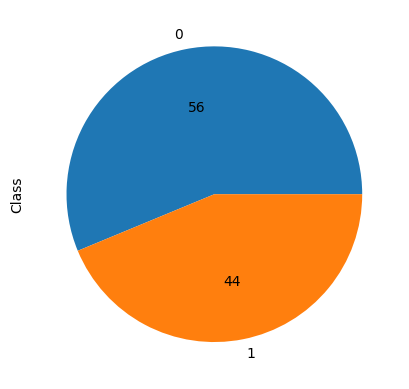

In [78]:
# Melakukan ploting sederhana
y_clean.value_counts().plot.pie(autopct = '%2.f').set_ylabel('Class')

#### Melakukan Balancing Data

In [94]:
# Melakukan Balancing data
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy = 1)
X_res_under, y_res_under = rus.fit_resample(X_clean, y_clean)

Text(0, 0.5, 'Class')

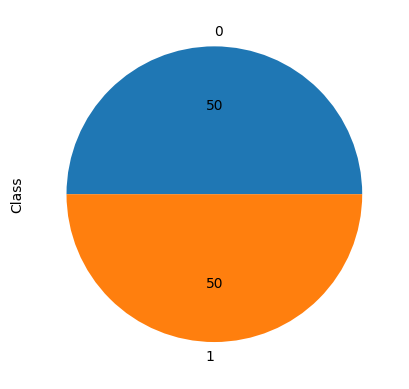

In [95]:
# Cek hasil setelah di balancing
ax = y_res_under.value_counts().plot.pie(autopct = '%2.f')
ax.set_ylabel('Class')

In [96]:
y_res_under.value_counts()

class
0    581
1    581
Name: count, dtype: int64

In [98]:
df_clean = pd.merge(X_res_under, y_res_under, left_index = True, right_index = True)
df_clean = df_clean.reset_index(drop = True)
df_clean

,variance,skewness,curtosis,entropy,class
0,2.949900,2.24930,1.34580,-0.037083,0
1,5.627200,10.08570,-4.29310,-3.814200,0
2,2.664800,10.75400,-3.39940,-4.168500,0
3,0.884440,6.59060,0.55837,-0.441820,0
4,-0.023579,7.17420,0.78457,-0.757340,0
...,...,...,...,...,...
1157,-2.410000,3.74330,-0.40215,-1.295300,1
1158,0.406140,1.34920,-1.45010,-0.559490,1
1159,-1.388700,-4.87730,6.47740,0.341790,1
1160,-3.563700,-8.38270,12.39300,-1.282300,1


<Axes: >

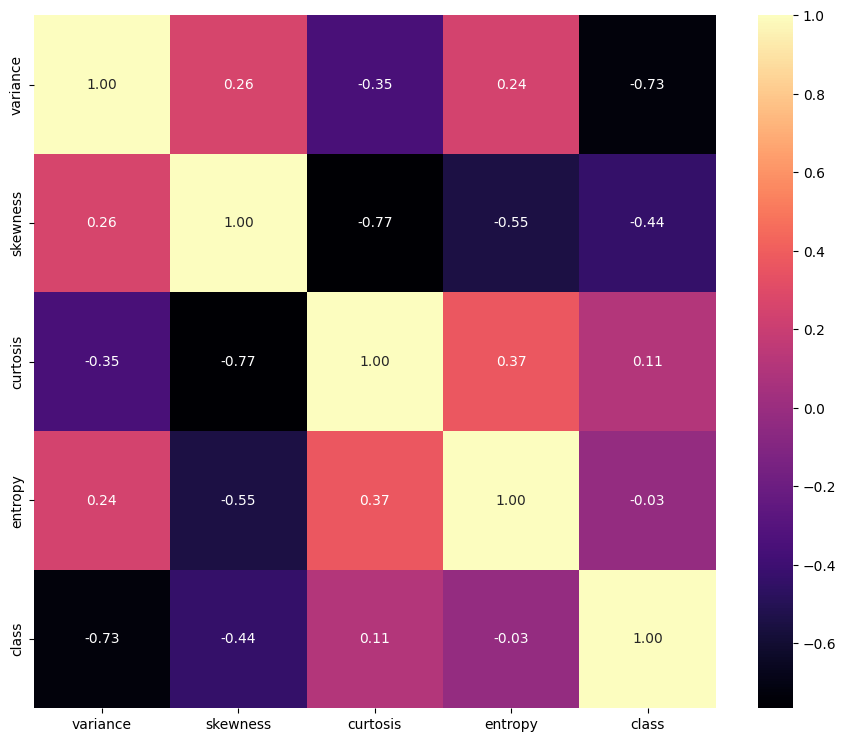

In [99]:
# Melihat fitur2 apa yang perlu di buang / Feature Selection
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat correlation map (pearson correlation)
plt.figure(figsize=(11,9))
cor = df_clean.corr('pearson')
'''
  annot = untuk menampilkan angka didalam korelasi, jika False tidak akan tampil
  cmap = warna mapnya
  fmt = menggunakan 2 angka dibelakang koma
'''
sns.heatmap(cor, annot = True, cmap = 'magma', fmt='.2f')

In [100]:
## Asumsikan untuk cari hubungan yg kuat yg lebih dari atau sama dengan 4 ( >=4 )
# Buat abs supaya tidak perlu melihat nilai negatif
cor_target = abs(cor['class'])
cor_target

variance    0.726872
skewness    0.437930
curtosis    0.105186
entropy     0.025120
class       1.000000
Name: class, dtype: float64

In [101]:
relevant_features = cor_target[cor_target >= 0.4]
relevant_features

variance    0.726872
skewness    0.437930
class       1.000000
Name: class, dtype: float64

In [102]:
# Buat dataframe supaya mudah untuk dibaca/lihat
df_clean1 = df_clean[["variance", "skewness", "class"]]
df_clean1 = df_clean1.reset_index(drop = True)
df_clean1

,variance,skewness,class
0,2.949900,2.24930,0
1,5.627200,10.08570,0
2,2.664800,10.75400,0
3,0.884440,6.59060,0
4,-0.023579,7.17420,0
...,...,...,...
1157,-2.410000,3.74330,1
1158,0.406140,1.34920,1
1159,-1.388700,-4.87730,1
1160,-3.563700,-8.38270,1


Text(0, 0.5, 'Skewness')

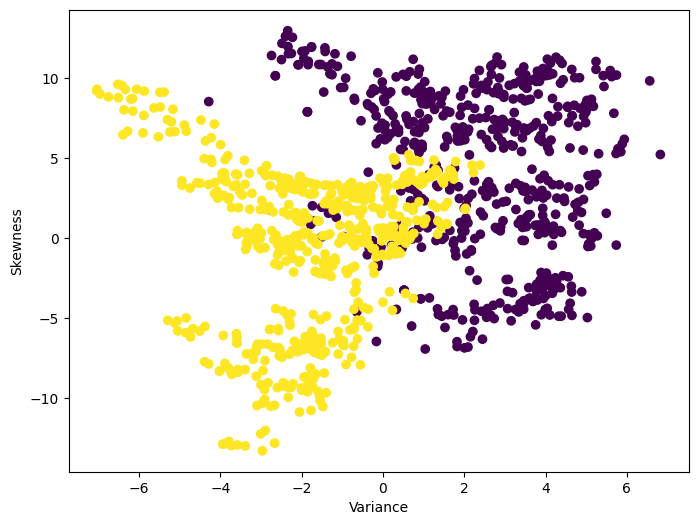

In [103]:
plt.figure(figsize=(8,6))
'''
  c = colour
'''
plt.scatter(df_clean1.iloc[:,0], df_clean1.iloc[:,1], c = df_clean1['class'])
plt.xlabel('Variance')
plt.ylabel('Skewness')

In [104]:
# Membuat variable penampung fitur dan class
X = df_clean.iloc[:,:2]
y = df_clean.iloc[:,-1]

In [105]:
X

,variance,skewness
0,2.949900,2.24930
1,5.627200,10.08570
2,2.664800,10.75400
3,0.884440,6.59060
4,-0.023579,7.17420
...,...,...
1157,-2.410000,3.74330
1158,0.406140,1.34920
1159,-1.388700,-4.87730
1160,-3.563700,-8.38270


In [106]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1157    1
1158    1
1159    1
1160    1
1161    1
Name: class, Length: 1162, dtype: int32

In [108]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 99)

# Modelling

In [111]:
from sklearn.neighbors import KNeighborsClassifier
knn_final = KNeighborsClassifier()

cv = KFold(n_splits = 10, random_state = 99, shuffle=True)

grid_params_knn = { 'n_neighbors' : range(1, 40), 'metric' : ['minkowski','euclidean','manhattan']}

gs = GridSearchCV(KNeighborsClassifier(), grid_params_knn, cv=cv)
gs.fit(X_train, y_train)
gs.best_params_

{'metric': 'minkowski', 'n_neighbors': 26}

In [113]:
from sklearn import metrics

knn_final = KNeighborsClassifier(**gs.best_params_)
knn_final.fit(X_train, y_train)
knn_final.score(X_test, y_test)

0.9399141630901288

In [115]:
# Jika penasaran untuk cek K Value secara manual
accuracy = []
count = []
for i in range (1,41):
  knn_manual = KNeighborsClassifier(n_neighbors = i, metric = 'manhattan')
  knn_manual.fit(X_train, y_train)
  accuracy.append(knn_manual.score(X_test,y_test))
  count.append(i)

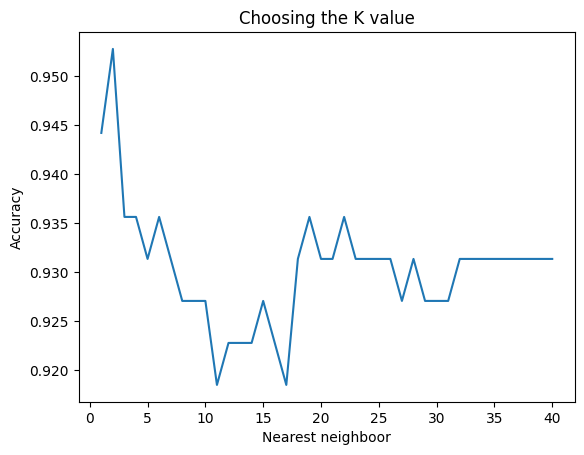

In [116]:
plt.title('Choosing the K value')
plt.plot(count,accuracy)
plt.xlabel('Nearest neighboor')
plt.ylabel('Accuracy')
plt.show()

# Deployment

In [117]:
New_data = pd.read_excel("./../../Bootcamp/New_data.xlsx")
New_data

,variance,skewness,curtosis,entropy,class
0,-2.215300,11.9625,0.078538,-7.78530,authentic
1,2.126500,6.8783,0.447840,-2.22240,authentic
2,0.007125,8.3661,0.507810,-3.81550,authentic
3,2.289300,3.7330,0.631200,-0.39786,authentic
4,4.339800,-5.3036,3.880300,-0.70432,authentic
5,-5.441400,7.2363,0.109380,-7.56420,counterfeit
6,-4.124400,3.7909,-0.653200,-4.18020,counterfeit
7,-4.195800,-8.1819,12.129100,-1.60170,counterfeit
8,-0.878340,3.2570,-3.677800,-3.29440,counterfeit
9,-0.898090,-4.4862,2.200900,0.50731,counterfeit


In [118]:
X_new = New_data.iloc[:, :2]
y_new = New_data.iloc[:,-1]

In [120]:
y_pred = knn_final.predict(X_new)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [121]:
diag = []
for i in range(len(y_pred)):
  if y_pred[i] == 0:
    diag.append('authentic')
  elif y_pred[i] == 1:
    diag.append('counterfeit')

diag = pd.DataFrame(diag, columns = ['Predicted class'])

In [122]:
diag

,Predicted class
0,authentic
1,authentic
2,authentic
3,authentic
4,authentic
5,counterfeit
6,counterfeit
7,counterfeit
8,counterfeit
9,counterfeit


In [123]:
compare = pd.merge(diag, New_data['class'], left_index=True, right_index=True)
compare

,Predicted class,class
0,authentic,authentic
1,authentic,authentic
2,authentic,authentic
3,authentic,authentic
4,authentic,authentic
5,counterfeit,counterfeit
6,counterfeit,counterfeit
7,counterfeit,counterfeit
8,counterfeit,counterfeit
9,counterfeit,counterfeit
